# Paper Trading with Python and Binance - the Spot Testnet API

More Information and getting the Credentials: https://testnet.binance.vision/

__Insert your Spot Testnet Credentials here__:

In [11]:
api_key="UW1N8cz2r5ZIxFsBiF4WXDYyNJIbMtqHema1USdfSvUbQYG4wU2Ad8ZZn9Y2xfPa"
secret_key="iWpfQkCcr9OYrsZD8iddiTj6AYDk3tg6Paw1S0dXTlg4T0wapzb53bLR4fWxItvU"


## Creating a Connection to the Spot Testnet

In [12]:
from binance.client import Client

In [13]:
client = Client(api_key = api_key, api_secret = secret_key, tld = "com", testnet = True) # Testnet!!!

__Simple Rule:__ <br>
Use your __Testnet Credentials with testnet = True__ and your __"Real Account" Credentials with testnet = False__ (default)

In [14]:
client

In [15]:
client.get_account() # Test account details

{'makerCommission': 0,
 'takerCommission': 0,
 'buyerCommission': 0,
 'sellerCommission': 0,
 'commissionRates': {'maker': '0.00000000',
  'taker': '0.00000000',
  'buyer': '0.00000000',
  'seller': '0.00000000'},
 'canTrade': True,
 'canWithdraw': False,
 'canDeposit': False,
 'brokered': False,
 'requireSelfTradePrevention': False,
 'updateTime': 1674299188527,
 'accountType': 'SPOT',
 'balances': [{'asset': 'BNB',
   'free': '1000.00000000',
   'locked': '0.00000000'},
  {'asset': 'BTC', 'free': '1.00000000', 'locked': '0.00000000'},
  {'asset': 'BUSD', 'free': '10000.00000000', 'locked': '0.00000000'},
  {'asset': 'ETH', 'free': '100.00000000', 'locked': '0.00000000'},
  {'asset': 'LTC', 'free': '500.00000000', 'locked': '0.00000000'},
  {'asset': 'TRX', 'free': '500000.00000000', 'locked': '0.00000000'},
  {'asset': 'USDT', 'free': '10000.00000000', 'locked': '0.00000000'},
  {'asset': 'XRP', 'free': '50000.00000000', 'locked': '0.00000000'}],
 'permissions': ['SPOT']}

## Spot Testnet API - Overview

__Same Documentation applies for Spot Testnet:__

https://binance-docs.github.io/apidocs/spot/en/#introduction

In [16]:
import pandas as pd
from binance.client import Client

In [17]:
client = Client(api_key = api_key, api_secret = secret_key, tld = "com", testnet = True) # Testnet!!!

In [18]:
client.get_system_status()

{'status': 0, 'msg': 'normal'}

In [19]:
account = client.get_account()
account

{'makerCommission': 0,
 'takerCommission': 0,
 'buyerCommission': 0,
 'sellerCommission': 0,
 'commissionRates': {'maker': '0.00000000',
  'taker': '0.00000000',
  'buyer': '0.00000000',
  'seller': '0.00000000'},
 'canTrade': True,
 'canWithdraw': False,
 'canDeposit': False,
 'brokered': False,
 'requireSelfTradePrevention': False,
 'updateTime': 1674299188527,
 'accountType': 'SPOT',
 'balances': [{'asset': 'BNB',
   'free': '1000.00000000',
   'locked': '0.00000000'},
  {'asset': 'BTC', 'free': '1.00000000', 'locked': '0.00000000'},
  {'asset': 'BUSD', 'free': '10000.00000000', 'locked': '0.00000000'},
  {'asset': 'ETH', 'free': '100.00000000', 'locked': '0.00000000'},
  {'asset': 'LTC', 'free': '500.00000000', 'locked': '0.00000000'},
  {'asset': 'TRX', 'free': '500000.00000000', 'locked': '0.00000000'},
  {'asset': 'USDT', 'free': '10000.00000000', 'locked': '0.00000000'},
  {'asset': 'XRP', 'free': '50000.00000000', 'locked': '0.00000000'}],
 'permissions': ['SPOT']}

In [20]:
df = pd.DataFrame(account["balances"])
df

,asset,free,locked
0,BNB,1000.00000000,0.00000000
1,BTC,1.00000000,0.00000000
2,BUSD,10000.00000000,0.00000000
3,ETH,100.00000000,0.00000000
4,LTC,500.00000000,0.00000000
5,TRX,500000.00000000,0.00000000
6,USDT,10000.00000000,0.00000000
7,XRP,50000.00000000,0.00000000


In [21]:
df.free = pd.to_numeric(df.free, errors = "coerce")
df.locked = pd.to_numeric(df.locked, errors = "coerce")

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   asset   8 non-null      object 
 1   free    8 non-null      float64
 2   locked  8 non-null      float64
dtypes: float64(2), object(1)
memory usage: 320.0+ bytes


In [23]:
client.get_asset_balance(asset = "BTC")

{'asset': 'BTC', 'free': '1.00000000', 'locked': '0.00000000'}

In [24]:
client.get_asset_balance(asset = "ETH")

{'asset': 'ETH', 'free': '100.00000000', 'locked': '0.00000000'}

In [25]:
client.get_asset_balance(asset = "EUR")

In [26]:
client.get_symbol_ticker(symbol = "BTCUSDT") # current price for one symbol

{'symbol': 'BTCUSDT', 'price': '22758.84000000'}

In [27]:
# get current prices for all pairs
client.get_all_tickers()

[{'symbol': 'BNBBUSD', 'price': '301.60000000'},
 {'symbol': 'BTCBUSD', 'price': '22764.89000000'},
 {'symbol': 'ETHBUSD', 'price': '1639.76000000'},
 {'symbol': 'LTCBUSD', 'price': '88.88000000'},
 {'symbol': 'TRXBUSD', 'price': '0.06224000'},
 {'symbol': 'XRPBUSD', 'price': '0.40790000'},
 {'symbol': 'BNBUSDT', 'price': '301.60000000'},
 {'symbol': 'BTCUSDT', 'price': '22758.84000000'},
 {'symbol': 'ETHUSDT', 'price': '1639.32000000'},
 {'symbol': 'LTCUSDT', 'price': '88.85000000'},
 {'symbol': 'TRXUSDT', 'price': '0.06222000'},
 {'symbol': 'XRPUSDT', 'price': '0.40730000'},
 {'symbol': 'BNBBTC', 'price': '0.01325500'},
 {'symbol': 'ETHBTC', 'price': '0.07203200'},
 {'symbol': 'LTCBTC', 'price': '0.00390700'},
 {'symbol': 'TRXBTC', 'price': '0.00000273'},
 {'symbol': 'XRPBTC', 'price': '0.00001790'},
 {'symbol': 'LTCBNB', 'price': '0.29480000'},
 {'symbol': 'TRXBNB', 'price': '0.00020630'},
 {'symbol': 'XRPBNB', 'price': '0.00135100'}]

In [28]:
last24 = client.get_ticker(symbol = "BTCUSDT") # 24H Price change statistic
last24

{'symbol': 'BTCUSDT',
 'priceChange': '1790.54000000',
 'priceChangePercent': '8.539',
 'weightedAvgPrice': '22027.40186346',
 'prevClosePrice': '20967.75000000',
 'lastPrice': '22758.84000000',
 'lastQty': '0.11950200',
 'bidPrice': '22757.03000000',
 'bidQty': '0.02000000',
 'askPrice': '22757.56000000',
 'askQty': '0.11336900',
 'openPrice': '20968.30000000',
 'highPrice': '23329.29000000',
 'lowPrice': '20719.55000000',
 'volume': '8778.49331200',
 'quoteVolume': '193367399.93909463',
 'openTime': 1674212943441,
 'closeTime': 1674299343441,
 'firstId': 2595805,
 'lastId': 2834572,
 'count': 238768}

In [29]:
timestamp = client._get_earliest_valid_timestamp(symbol = "BTCUSDT", interval = "1d")
timestamp

1672790400000

In [30]:
pd.to_datetime(timestamp, unit = "ms") # reset every month!!!

Timestamp('2023-01-04 00:00:00')

In [31]:
def get_history(symbol, interval, start, end = None):
    bars = client.get_historical_klines(symbol = symbol, interval = interval,
                                        start_str = start, end_str = end, limit = 1000)
    df = pd.DataFrame(bars)
    df["Date"] = pd.to_datetime(df.iloc[:,0], unit = "ms")
    df.columns = ["Open Time", "Open", "High", "Low", "Close", "Volume",
                  "Clos Time", "Quote Asset Volume", "Number of Trades",
                  "Taker Buy Base Asset Volume", "Taker Buy Quote Asset Volume", "Ignore", "Date"]
    df = df[["Date", "Open", "High", "Low", "Close", "Volume"]].copy()
    df.set_index("Date", inplace = True)
    for column in df.columns:
        df[column] = pd.to_numeric(df[column], errors = "coerce")
    
    return df

In [32]:
df = get_history(symbol = "BTCUSDT", interval = "1d", start = timestamp)
df

,Open,High,Low,Close,Volume
Date,,,,,
2023-01-04,16861.59,30000.00,8307.14,16850.67,6110.725091
2023-01-05,16850.87,60000.00,4135.70,16831.69,8939.577124
2023-01-06,16831.66,24422.69,3357.00,16950.57,8563.700707
2023-01-07,16950.36,60000.00,4863.40,16944.29,6624.075195
2023-01-08,16943.98,17706.40,16273.43,17128.81,7033.382652
2023-01-09,17128.84,60599.80,3457.00,17178.03,9033.356120
2023-01-10,17178.69,30000.00,3543.00,17440.48,7607.865235
2023-01-11,17440.42,60000.00,5000.00,17943.28,9328.609117
2023-01-12,17944.24,60000.00,4543.00,18846.13,9305.925209


In [33]:
df = get_history(symbol = "BTCUSDT", interval = "1h", start = "2021-09-15")
df

,Open,High,Low,Close,Volume
Date,,,,,
2023-01-04 07:00:00,16861.59,18035.75,8307.14,16870.19,165.974367
2023-01-04 08:00:00,16870.19,18622.19,16834.03,16864.48,362.609226
2023-01-04 09:00:00,16864.78,16868.05,16834.81,16845.39,285.018550
2023-01-04 10:00:00,16844.91,16847.60,16832.66,16845.20,263.440738
2023-01-04 11:00:00,16845.36,24403.80,16834.53,16835.50,268.579032
...,...,...,...,...,...
2023-01-21 07:00:00,22619.70,22656.89,22601.91,22639.19,294.837230
2023-01-21 08:00:00,22640.23,22795.44,22626.90,22704.94,341.888779
2023-01-21 09:00:00,22706.70,23060.06,22688.21,23029.30,353.827033


In [34]:
from binance import ThreadedWebsocketManager

In [35]:
def stream_data(msg):
    ''' define how to process incoming WebSocket messages '''
    
    time = pd.to_datetime(msg["E"], unit = "ms")
    price = msg["c"]
    
    print("Time: {} | Price: {}".format(time, price))

In [36]:
# initialize and start the WebSocket
twm = ThreadedWebsocketManager()
twm.start()

In [37]:
# subscribe to the stream
twm.start_symbol_miniticker_socket(callback = stream_data, symbol = "BTCUSDT")

'btcusdt@miniTicker'

In [38]:
twm.stop() # stop the Websocket/Stream

## Placing a Market Buy Order

In [39]:
from binance.client import Client
import pandas as pd

In [40]:
client = Client(api_key = api_key, api_secret = secret_key, tld = "com", testnet = True) 

In [41]:
client.get_account() 

{'makerCommission': 0,
 'takerCommission': 0,
 'buyerCommission': 0,
 'sellerCommission': 0,
 'commissionRates': {'maker': '0.00000000',
  'taker': '0.00000000',
  'buyer': '0.00000000',
  'seller': '0.00000000'},
 'canTrade': True,
 'canWithdraw': False,
 'canDeposit': False,
 'brokered': False,
 'requireSelfTradePrevention': False,
 'updateTime': 1674299188527,
 'accountType': 'SPOT',
 'balances': [{'asset': 'BNB',
   'free': '1000.00000000',
   'locked': '0.00000000'},
  {'asset': 'BTC', 'free': '1.00000000', 'locked': '0.00000000'},
  {'asset': 'BUSD', 'free': '10000.00000000', 'locked': '0.00000000'},
  {'asset': 'ETH', 'free': '100.00000000', 'locked': '0.00000000'},
  {'asset': 'LTC', 'free': '500.00000000', 'locked': '0.00000000'},
  {'asset': 'TRX', 'free': '500000.00000000', 'locked': '0.00000000'},
  {'asset': 'USDT', 'free': '10000.00000000', 'locked': '0.00000000'},
  {'asset': 'XRP', 'free': '50000.00000000', 'locked': '0.00000000'}],
 'permissions': ['SPOT']}

In [42]:
# buy 0.1 BTC
order = client.create_order(symbol = "BTCUSDT", side = "BUY", type = "MARKET", quantity = 0.1)

In [43]:
order

{'symbol': 'BTCUSDT',
 'orderId': 10787333,
 'orderListId': -1,
 'clientOrderId': 'd0ZGTa2R2CWRJj2VKoscpM',
 'transactTime': 1674299345028,
 'price': '0.00000000',
 'origQty': '0.10000000',
 'executedQty': '0.10000000',
 'cummulativeQuoteQty': '2275.79385718',
 'status': 'FILLED',
 'timeInForce': 'GTC',
 'type': 'MARKET',
 'side': 'BUY',
 'workingTime': 1674299345028,
 'fills': [{'price': '22757.93000000',
   'qty': '0.05714100',
   'commission': '0.00000000',
   'commissionAsset': 'BTC',
   'tradeId': 2834577},
  {'price': '22757.95000000',
   'qty': '0.04285900',
   'commission': '0.00000000',
   'commissionAsset': 'BTC',
   'tradeId': 2834578}],
 'selfTradePreventionMode': 'NONE'}

In [44]:
df = pd.DataFrame(order["fills"])
df

,price,qty,commission,commissionAsset,tradeId
0,22757.93000000,0.05714100,0.00000000,BTC,2834577
1,22757.95000000,0.04285900,0.00000000,BTC,2834578


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   price            2 non-null      object
 1   qty              2 non-null      object
 2   commission       2 non-null      object
 3   commissionAsset  2 non-null      object
 4   tradeId          2 non-null      int64 
dtypes: int64(1), object(4)
memory usage: 208.0+ bytes


In [46]:
num_columns = ["price", "qty", "commission"]

In [47]:
for column in num_columns:
    df[column] = pd.to_numeric(df[column], errors = "coerce")

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            2 non-null      float64
 1   qty              2 non-null      float64
 2   commission       2 non-null      float64
 3   commissionAsset  2 non-null      object 
 4   tradeId          2 non-null      int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 208.0+ bytes


In [49]:
df.qty.sum()

0.1

In [50]:
df.price.mul(df.qty).sum()

2275.79385718

In [51]:
client.get_account()

{'makerCommission': 0,
 'takerCommission': 0,
 'buyerCommission': 0,
 'sellerCommission': 0,
 'commissionRates': {'maker': '0.00000000',
  'taker': '0.00000000',
  'buyer': '0.00000000',
  'seller': '0.00000000'},
 'canTrade': True,
 'canWithdraw': False,
 'canDeposit': False,
 'brokered': False,
 'requireSelfTradePrevention': False,
 'updateTime': 1674299345028,
 'accountType': 'SPOT',
 'balances': [{'asset': 'BNB',
   'free': '1000.00000000',
   'locked': '0.00000000'},
  {'asset': 'BTC', 'free': '1.10000000', 'locked': '0.00000000'},
  {'asset': 'BUSD', 'free': '10000.00000000', 'locked': '0.00000000'},
  {'asset': 'ETH', 'free': '100.00000000', 'locked': '0.00000000'},
  {'asset': 'LTC', 'free': '500.00000000', 'locked': '0.00000000'},
  {'asset': 'TRX', 'free': '500000.00000000', 'locked': '0.00000000'},
  {'asset': 'USDT', 'free': '7724.20614282', 'locked': '0.00000000'},
  {'asset': 'XRP', 'free': '50000.00000000', 'locked': '0.00000000'}],
 'permissions': ['SPOT']}

In [52]:
# buy BTC for 1,000 USDT 
order = client.create_order(symbol = "BTCUSDT", side = "BUY", type = "MARKET", quoteOrderQty = 1000)

In [53]:
order

{'symbol': 'BTCUSDT',
 'orderId': 10787338,
 'orderListId': -1,
 'clientOrderId': 'ZZvc1zs4z8NCbkD6OAmJab',
 'transactTime': 1674299345719,
 'price': '0.00000000',
 'origQty': '0.04393500',
 'executedQty': '0.04393500',
 'cummulativeQuoteQty': '999.98740035',
 'status': 'FILLED',
 'timeInForce': 'GTC',
 'type': 'MARKET',
 'side': 'BUY',
 'workingTime': 1674299345719,
 'fills': [{'price': '22760.61000000',
   'qty': '0.04393500',
   'commission': '0.00000000',
   'commissionAsset': 'BTC',
   'tradeId': 2834585}],
 'selfTradePreventionMode': 'NONE'}

In [54]:
avr_price = float(order["cummulativeQuoteQty"]) / float(order["origQty"]) 
avr_price

22760.61

In [55]:
client.get_account()

{'makerCommission': 0,
 'takerCommission': 0,
 'buyerCommission': 0,
 'sellerCommission': 0,
 'commissionRates': {'maker': '0.00000000',
  'taker': '0.00000000',
  'buyer': '0.00000000',
  'seller': '0.00000000'},
 'canTrade': True,
 'canWithdraw': False,
 'canDeposit': False,
 'brokered': False,
 'requireSelfTradePrevention': False,
 'updateTime': 1674299345719,
 'accountType': 'SPOT',
 'balances': [{'asset': 'BNB',
   'free': '1000.00000000',
   'locked': '0.00000000'},
  {'asset': 'BTC', 'free': '1.14393500', 'locked': '0.00000000'},
  {'asset': 'BUSD', 'free': '10000.00000000', 'locked': '0.00000000'},
  {'asset': 'ETH', 'free': '100.00000000', 'locked': '0.00000000'},
  {'asset': 'LTC', 'free': '500.00000000', 'locked': '0.00000000'},
  {'asset': 'TRX', 'free': '500000.00000000', 'locked': '0.00000000'},
  {'asset': 'USDT', 'free': '6724.21874247', 'locked': '0.00000000'},
  {'asset': 'XRP', 'free': '50000.00000000', 'locked': '0.00000000'}],
 'permissions': ['SPOT']}

## Placing a Market Sell Order

In [56]:
# selling 0.118011 BTC 
order = client.create_order(symbol = "BTCUSDT", side = "SELL", type = "MARKET", quantity = 0.1)

In [57]:
order

{'symbol': 'BTCUSDT',
 'orderId': 10787341,
 'orderListId': -1,
 'clientOrderId': '6o3ZccoTlisIXc2rBIss2z',
 'transactTime': 1674299346045,
 'price': '0.00000000',
 'origQty': '0.10000000',
 'executedQty': '0.10000000',
 'cummulativeQuoteQty': '2275.70500000',
 'status': 'FILLED',
 'timeInForce': 'GTC',
 'type': 'MARKET',
 'side': 'SELL',
 'workingTime': 1674299346045,
 'fills': [{'price': '22757.85000000',
   'qty': '0.02000000',
   'commission': '0.00000000',
   'commissionAsset': 'USDT',
   'tradeId': 2834586},
  {'price': '22756.85000000',
   'qty': '0.08000000',
   'commission': '0.00000000',
   'commissionAsset': 'USDT',
   'tradeId': 2834587}],
 'selfTradePreventionMode': 'NONE'}

In [58]:
client.get_account() # Test account details

{'makerCommission': 0,
 'takerCommission': 0,
 'buyerCommission': 0,
 'sellerCommission': 0,
 'commissionRates': {'maker': '0.00000000',
  'taker': '0.00000000',
  'buyer': '0.00000000',
  'seller': '0.00000000'},
 'canTrade': True,
 'canWithdraw': False,
 'canDeposit': False,
 'brokered': False,
 'requireSelfTradePrevention': False,
 'updateTime': 1674299346045,
 'accountType': 'SPOT',
 'balances': [{'asset': 'BNB',
   'free': '1000.00000000',
   'locked': '0.00000000'},
  {'asset': 'BTC', 'free': '1.04393500', 'locked': '0.00000000'},
  {'asset': 'BUSD', 'free': '10000.00000000', 'locked': '0.00000000'},
  {'asset': 'ETH', 'free': '100.00000000', 'locked': '0.00000000'},
  {'asset': 'LTC', 'free': '500.00000000', 'locked': '0.00000000'},
  {'asset': 'TRX', 'free': '500000.00000000', 'locked': '0.00000000'},
  {'asset': 'USDT', 'free': '8999.92374247', 'locked': '0.00000000'},
  {'asset': 'XRP', 'free': '50000.00000000', 'locked': '0.00000000'}],
 'permissions': ['SPOT']}

## Placing Limit Orders

In [59]:
from binance.client import Client
import pandas as pd

In [60]:
client = Client(api_key = api_key, api_secret = secret_key, tld = "com", testnet = True) 

In [61]:
client.get_account()

{'makerCommission': 0,
 'takerCommission': 0,
 'buyerCommission': 0,
 'sellerCommission': 0,
 'commissionRates': {'maker': '0.00000000',
  'taker': '0.00000000',
  'buyer': '0.00000000',
  'seller': '0.00000000'},
 'canTrade': True,
 'canWithdraw': False,
 'canDeposit': False,
 'brokered': False,
 'requireSelfTradePrevention': False,
 'updateTime': 1674299346045,
 'accountType': 'SPOT',
 'balances': [{'asset': 'BNB',
   'free': '1000.00000000',
   'locked': '0.00000000'},
  {'asset': 'BTC', 'free': '1.04393500', 'locked': '0.00000000'},
  {'asset': 'BUSD', 'free': '10000.00000000', 'locked': '0.00000000'},
  {'asset': 'ETH', 'free': '100.00000000', 'locked': '0.00000000'},
  {'asset': 'LTC', 'free': '500.00000000', 'locked': '0.00000000'},
  {'asset': 'TRX', 'free': '500000.00000000', 'locked': '0.00000000'},
  {'asset': 'USDT', 'free': '8999.92374247', 'locked': '0.00000000'},
  {'asset': 'XRP', 'free': '50000.00000000', 'locked': '0.00000000'}],
 'permissions': ['SPOT']}

In [62]:
client.get_symbol_ticker(symbol = "BTCUSDT") # current price

{'symbol': 'BTCUSDT', 'price': '22760.62000000'}

__Limit Buy Order__

In [102]:
order1 = client.create_order(symbol="BTCUSDT", side = "BUY", type = "LIMIT",
                            quantity = 0.1, timeInForce = "GTC", price = 10000)

In [103]:
order1

{'symbol': 'BTCUSDT',
 'orderId': 10790656,
 'orderListId': -1,
 'clientOrderId': 'AYDZCeQOSz45vu6vfTOXhE',
 'transactTime': 1674299958872,
 'price': '10000.00000000',
 'origQty': '0.10000000',
 'executedQty': '0.00000000',
 'cummulativeQuoteQty': '0.00000000',
 'status': 'NEW',
 'timeInForce': 'GTC',
 'type': 'LIMIT',
 'side': 'BUY',
 'workingTime': 1674299958872,
 'fills': [],
 'selfTradePreventionMode': 'NONE'}

In [104]:
order_id_buy = order1["orderId"]
order_id_buy

10790656

In [105]:
client.get_order(symbol = "BTCUSDT", orderId = order_id_buy)

{'symbol': 'BTCUSDT',
 'orderId': 10790656,
 'orderListId': -1,
 'clientOrderId': 'AYDZCeQOSz45vu6vfTOXhE',
 'price': '10000.00000000',
 'origQty': '0.10000000',
 'executedQty': '0.00000000',
 'cummulativeQuoteQty': '0.00000000',
 'status': 'NEW',
 'timeInForce': 'GTC',
 'type': 'LIMIT',
 'side': 'BUY',
 'stopPrice': '0.00000000',
 'icebergQty': '0.00000000',
 'time': 1674299958872,
 'updateTime': 1674299958872,
 'isWorking': True,
 'workingTime': 1674299958872,
 'origQuoteOrderQty': '0.00000000',
 'selfTradePreventionMode': 'NONE'}

__Limit Sell Order__

In [106]:
order2 = client.create_order(symbol="BTCUSDT", side = "SELL", type = "LIMIT",
                            quantity = 0.1, timeInForce = "GTC", price = 30000)

In [107]:
order2

{'symbol': 'BTCUSDT',
 'orderId': 10790677,
 'orderListId': -1,
 'clientOrderId': 'rmOADRUUIr1VFtoGeY7JUu',
 'transactTime': 1674299963144,
 'price': '30000.00000000',
 'origQty': '0.10000000',
 'executedQty': '0.00000000',
 'cummulativeQuoteQty': '0.00000000',
 'status': 'NEW',
 'timeInForce': 'GTC',
 'type': 'LIMIT',
 'side': 'SELL',
 'workingTime': 1674299963144,
 'fills': [],
 'selfTradePreventionMode': 'NONE'}

In [108]:
order_id_sell = order2["orderId"]
order_id_sell

10790677

In [109]:
open_orders = client.get_open_orders(symbol = "BTCUSDT")
open_orders

[{'symbol': 'BTCUSDT',
  'orderId': 10787347,
  'orderListId': -1,
  'clientOrderId': 'Mocf14nkIlPMSwDM0ittTG',
  'price': '60000.00000000',
  'origQty': '0.10000000',
  'executedQty': '0.00000000',
  'cummulativeQuoteQty': '0.00000000',
  'status': 'NEW',
  'timeInForce': 'GTC',
  'type': 'LIMIT',
  'side': 'SELL',
  'stopPrice': '0.00000000',
  'icebergQty': '0.00000000',
  'time': 1674299347091,
  'updateTime': 1674299347091,
  'isWorking': True,
  'workingTime': 1674299347091,
  'origQuoteOrderQty': '0.00000000',
  'selfTradePreventionMode': 'NONE'},
 {'symbol': 'BTCUSDT',
  'orderId': 10790119,
  'orderListId': -1,
  'clientOrderId': 'ZekhDzVs7kBuukF4vUp0Vm',
  'price': '60000.00000000',
  'origQty': '0.10000000',
  'executedQty': '0.00000000',
  'cummulativeQuoteQty': '0.00000000',
  'status': 'NEW',
  'timeInForce': 'GTC',
  'type': 'LIMIT',
  'side': 'SELL',
  'stopPrice': '0.00000000',
  'icebergQty': '0.00000000',
  'time': 1674299860688,
  'updateTime': 1674299860688,
  'isW

In [110]:
pd.DataFrame(open_orders)

,symbol,orderId,orderListId,clientOrderId,price,origQty,executedQty,cummulativeQuoteQty,status,timeInForce,type,side,stopPrice,icebergQty,time,updateTime,isWorking,workingTime,origQuoteOrderQty,selfTradePreventionMode
0,BTCUSDT,10787347,-1,Mocf14nkIlPMSwDM0ittTG,60000.00000000,0.10000000,0.00000000,0.00000000,NEW,GTC,LIMIT,SELL,0.00000000,0.00000000,1674299347091,1674299347091,True,1674299347091,0.00000000,NONE
1,BTCUSDT,10790119,-1,ZekhDzVs7kBuukF4vUp0Vm,60000.00000000,0.10000000,0.00000000,0.00000000,NEW,GTC,LIMIT,SELL,0.00000000,0.00000000,1674299860688,1674299860688,True,1674299860688,0.00000000,NONE
2,BTCUSDT,10790639,-1,CjS082aviZzGSOrBhmHy8i,30000.00000000,0.10000000,0.00000000,0.00000000,NEW,GTC,LIMIT,SELL,0.00000000,0.00000000,1674299955698,1674299955698,True,1674299955698,0.00000000,NONE
3,BTCUSDT,10790656,-1,AYDZCeQOSz45vu6vfTOXhE,10000.00000000,0.10000000,0.00000000,0.00000000,NEW,GTC,LIMIT,BUY,0.00000000,0.00000000,1674299958872,1674299958872,True,1674299958872,0.00000000,NONE
4,BTCUSDT,10790677,-1,rmOADRUUIr1VFtoGeY7JUu,30000.00000000,0.10000000,0.00000000,0.00000000,NEW,GTC,LIMIT,SELL,0.00000000,0.00000000,1674299963144,1674299963144,True,1674299963144,0.00000000,NONE


In [111]:
result = client.cancel_order(symbol = "BTCUSDT", orderId = order_id_buy)
result

{'symbol': 'BTCUSDT',
 'origClientOrderId': 'AYDZCeQOSz45vu6vfTOXhE',
 'orderId': 10790656,
 'orderListId': -1,
 'clientOrderId': 'OT1nBU9cqiPiXXl1fF8nRj',
 'price': '10000.00000000',
 'origQty': '0.10000000',
 'executedQty': '0.00000000',
 'cummulativeQuoteQty': '0.00000000',
 'status': 'CANCELED',
 'timeInForce': 'GTC',
 'type': 'LIMIT',
 'side': 'BUY',
 'selfTradePreventionMode': 'NONE'}

In [112]:
result = client.cancel_order(symbol = "BTCUSDT", orderId = order_id_sell)
result

{'symbol': 'BTCUSDT',
 'origClientOrderId': 'rmOADRUUIr1VFtoGeY7JUu',
 'orderId': 10790677,
 'orderListId': -1,
 'clientOrderId': 'xKcenlCB0262NjknPXTvxB',
 'price': '30000.00000000',
 'origQty': '0.10000000',
 'executedQty': '0.00000000',
 'cummulativeQuoteQty': '0.00000000',
 'status': 'CANCELED',
 'timeInForce': 'GTC',
 'type': 'LIMIT',
 'side': 'SELL',
 'selfTradePreventionMode': 'NONE'}

## Reporting: Getting all (historical) Orders and Trades

In [113]:
from binance.client import Client
import pandas as pd

In [114]:
client = Client(api_key = api_key, api_secret = secret_key, tld = "com", testnet = True) 

In [115]:
all_orders = client.get_all_orders(symbol = "BTCUSDT")
all_orders

[{'symbol': 'BTCUSDT',
  'orderId': 10787333,
  'orderListId': -1,
  'clientOrderId': 'd0ZGTa2R2CWRJj2VKoscpM',
  'price': '0.00000000',
  'origQty': '0.10000000',
  'executedQty': '0.10000000',
  'cummulativeQuoteQty': '2275.79385718',
  'status': 'FILLED',
  'timeInForce': 'GTC',
  'type': 'MARKET',
  'side': 'BUY',
  'stopPrice': '0.00000000',
  'icebergQty': '0.00000000',
  'time': 1674299345028,
  'updateTime': 1674299345028,
  'isWorking': True,
  'workingTime': 1674299345028,
  'origQuoteOrderQty': '0.00000000',
  'selfTradePreventionMode': 'NONE'},
 {'symbol': 'BTCUSDT',
  'orderId': 10787338,
  'orderListId': -1,
  'clientOrderId': 'ZZvc1zs4z8NCbkD6OAmJab',
  'price': '0.00000000',
  'origQty': '0.04393500',
  'executedQty': '0.04393500',
  'cummulativeQuoteQty': '999.98740035',
  'status': 'FILLED',
  'timeInForce': 'GTC',
  'type': 'MARKET',
  'side': 'BUY',
  'stopPrice': '0.00000000',
  'icebergQty': '0.00000000',
  'time': 1674299345719,
  'updateTime': 1674299345719,
  '

In [116]:
pd.DataFrame(all_orders)

,symbol,orderId,orderListId,clientOrderId,price,origQty,executedQty,cummulativeQuoteQty,status,timeInForce,type,side,stopPrice,icebergQty,time,updateTime,isWorking,workingTime,origQuoteOrderQty,selfTradePreventionMode
0,BTCUSDT,10787333,-1,d0ZGTa2R2CWRJj2VKoscpM,0.00000000,0.10000000,0.10000000,2275.79385718,FILLED,GTC,MARKET,BUY,0.00000000,0.00000000,1674299345028,1674299345028,True,1674299345028,0.00000000,NONE
1,BTCUSDT,10787338,-1,ZZvc1zs4z8NCbkD6OAmJab,0.00000000,0.04393500,0.04393500,999.98740035,FILLED,GTC,MARKET,BUY,0.00000000,0.00000000,1674299345719,1674299345719,True,1674299345719,1000.00000000,NONE
2,BTCUSDT,10787341,-1,6o3ZccoTlisIXc2rBIss2z,0.00000000,0.10000000,0.10000000,2275.70500000,FILLED,GTC,MARKET,SELL,0.00000000,0.00000000,1674299346045,1674299346045,True,1674299346045,0.00000000,NONE
3,BTCUSDT,10787346,-1,PgcBNVqa7H1ZtBjMVBwL7i,50000.00000000,0.10000000,0.10000000,2276.24560608,FILLED,GTC,LIMIT,BUY,0.00000000,0.00000000,1674299346757,1674299346757,True,1674299346757,0.00000000,NONE
4,BTCUSDT,10787347,-1,Mocf14nkIlPMSwDM0ittTG,60000.00000000,0.10000000,0.00000000,0.00000000,NEW,GTC,LIMIT,SELL,0.00000000,0.00000000,1674299347091,1674299347091,True,1674299347091,0.00000000,NONE
5,BTCUSDT,10789823,-1,tn3DL3xIl7FxWklGWAiYl4,60000.00000000,0.10000000,0.00000000,0.00000000,CANCELED,GTC,LIMIT,SELL,0.00000000,0.00000000,1674299806965,1674299816644,True,1674299806965,0.00000000,NONE
6,BTCUSDT,10790086,-1,gFnYZ7HJhYH7zGNZUWBVvR,50000.00000000,0.10000000,0.10000000,2271.92630944,FILLED,GTC,LIMIT,BUY,0.00000000,0.00000000,1674299855142,1674299855142,True,1674299855142,0.00000000,NONE
7,BTCUSDT,10790119,-1,ZekhDzVs7kBuukF4vUp0Vm,60000.00000000,0.10000000,0.00000000,0.00000000,NEW,GTC,LIMIT,SELL,0.00000000,0.00000000,1674299860688,1674299860688,True,1674299860688,0.00000000,NONE
8,BTCUSDT,10790493,-1,KCAXDl841b3OETqRdttvRD,10000.00000000,0.10000000,0.00000000,0.00000000,CANCELED,GTC,LIMIT,BUY,0.00000000,0.00000000,1674299929454,1674299940917,True,1674299929454,0.00000000,NONE
9,BTCUSDT,10790519,-1,XVumQtTGHuUSlTl8QKGGg1,20000.00000000,0.10000000,0.10000000,2268.71200000,FILLED,GTC,LIMIT,SELL,0.00000000,0.00000000,1674299934444,1674299934444,True,1674299934444,0.00000000,NONE


In [117]:
trades = client.get_my_trades(symbol = "BTCUSDT")
trades

[{'symbol': 'BTCUSDT',
  'id': 2834577,
  'orderId': 10787333,
  'orderListId': -1,
  'price': '22757.93000000',
  'qty': '0.05714100',
  'quoteQty': '1300.41087813',
  'commission': '0.00000000',
  'commissionAsset': 'BTC',
  'time': 1674299345028,
  'isBuyer': True,
  'isMaker': False,
  'isBestMatch': True},
 {'symbol': 'BTCUSDT',
  'id': 2834578,
  'orderId': 10787333,
  'orderListId': -1,
  'price': '22757.95000000',
  'qty': '0.04285900',
  'quoteQty': '975.38297905',
  'commission': '0.00000000',
  'commissionAsset': 'BTC',
  'time': 1674299345028,
  'isBuyer': True,
  'isMaker': False,
  'isBestMatch': True},
 {'symbol': 'BTCUSDT',
  'id': 2834585,
  'orderId': 10787338,
  'orderListId': -1,
  'price': '22760.61000000',
  'qty': '0.04393500',
  'quoteQty': '999.98740035',
  'commission': '0.00000000',
  'commissionAsset': 'BTC',
  'time': 1674299345719,
  'isBuyer': True,
  'isMaker': False,
  'isBestMatch': True},
 {'symbol': 'BTCUSDT',
  'id': 2834586,
  'orderId': 10787341,


In [118]:
df = pd.DataFrame(trades)
df

,symbol,id,orderId,orderListId,price,qty,quoteQty,commission,commissionAsset,time,isBuyer,isMaker,isBestMatch
0,BTCUSDT,2834577,10787333,-1,22757.93000000,0.05714100,1300.41087813,0.00000000,BTC,1674299345028,True,False,True
1,BTCUSDT,2834578,10787333,-1,22757.95000000,0.04285900,975.38297905,0.00000000,BTC,1674299345028,True,False,True
2,BTCUSDT,2834585,10787338,-1,22760.61000000,0.04393500,999.98740035,0.00000000,BTC,1674299345719,True,False,True
3,BTCUSDT,2834586,10787341,-1,22757.85000000,0.02000000,455.15700000,0.00000000,USDT,1674299346045,False,False,True
4,BTCUSDT,2834587,10787341,-1,22756.85000000,0.08000000,1820.54800000,0.00000000,USDT,1674299346045,False,False,True
5,BTCUSDT,2834592,10787346,-1,22762.45000000,0.09621200,2190.02083940,0.00000000,BTC,1674299346757,True,False,True
6,BTCUSDT,2834593,10787346,-1,22762.61000000,0.00378800,86.22476668,0.00000000,BTC,1674299346757,True,False,True
7,BTCUSDT,2835715,10790086,-1,22719.22000000,0.07306600,1660.00252852,0.00000000,BTC,1674299855142,True,False,True
8,BTCUSDT,2835716,10790086,-1,22719.38000000,0.02693400,611.92378092,0.00000000,BTC,1674299855142,True,False,True
9,BTCUSDT,2835876,10790519,-1,22687.12000000,0.10000000,2268.71200000,0.00000000,USDT,1674299934444,False,False,True


In [119]:
df.time = pd.to_datetime(df.time, unit = "ms", errors = "coerce")

In [120]:
df

,symbol,id,orderId,orderListId,price,qty,quoteQty,commission,commissionAsset,time,isBuyer,isMaker,isBestMatch
0,BTCUSDT,2834577,10787333,-1,22757.93000000,0.05714100,1300.41087813,0.00000000,BTC,2023-01-21 11:09:05.028,True,False,True
1,BTCUSDT,2834578,10787333,-1,22757.95000000,0.04285900,975.38297905,0.00000000,BTC,2023-01-21 11:09:05.028,True,False,True
2,BTCUSDT,2834585,10787338,-1,22760.61000000,0.04393500,999.98740035,0.00000000,BTC,2023-01-21 11:09:05.719,True,False,True
3,BTCUSDT,2834586,10787341,-1,22757.85000000,0.02000000,455.15700000,0.00000000,USDT,2023-01-21 11:09:06.045,False,False,True
4,BTCUSDT,2834587,10787341,-1,22756.85000000,0.08000000,1820.54800000,0.00000000,USDT,2023-01-21 11:09:06.045,False,False,True
5,BTCUSDT,2834592,10787346,-1,22762.45000000,0.09621200,2190.02083940,0.00000000,BTC,2023-01-21 11:09:06.757,True,False,True
6,BTCUSDT,2834593,10787346,-1,22762.61000000,0.00378800,86.22476668,0.00000000,BTC,2023-01-21 11:09:06.757,True,False,True
7,BTCUSDT,2835715,10790086,-1,22719.22000000,0.07306600,1660.00252852,0.00000000,BTC,2023-01-21 11:17:35.142,True,False,True
8,BTCUSDT,2835716,10790086,-1,22719.38000000,0.02693400,611.92378092,0.00000000,BTC,2023-01-21 11:17:35.142,True,False,True
9,BTCUSDT,2835876,10790519,-1,22687.12000000,0.10000000,2268.71200000,0.00000000,USDT,2023-01-21 11:18:54.444,False,False,True


## Creating & Running a first (simple) Trading Bot

In [121]:
from binance.client import Client
from binance import ThreadedWebsocketManager
import pandas as pd
import numpy as np

In [122]:
client = Client(api_key = api_key, api_secret = secret_key, tld = "com", testnet = True)

In [123]:
client.get_account()

{'makerCommission': 0,
 'takerCommission': 0,
 'buyerCommission': 0,
 'sellerCommission': 0,
 'commissionRates': {'maker': '0.00000000',
  'taker': '0.00000000',
  'buyer': '0.00000000',
  'seller': '0.00000000'},
 'canTrade': True,
 'canWithdraw': False,
 'canDeposit': False,
 'brokered': False,
 'requireSelfTradePrevention': False,
 'updateTime': 1674299969118,
 'accountType': 'SPOT',
 'balances': [{'asset': 'BNB',
   'free': '1000.00000000',
   'locked': '0.00000000'},
  {'asset': 'BTC', 'free': '0.84393500', 'locked': '0.30000000'},
  {'asset': 'BUSD', 'free': '10000.00000000', 'locked': '0.00000000'},
  {'asset': 'ETH', 'free': '100.00000000', 'locked': '0.00000000'},
  {'asset': 'LTC', 'free': '500.00000000', 'locked': '0.00000000'},
  {'asset': 'TRX', 'free': '500000.00000000', 'locked': '0.00000000'},
  {'asset': 'USDT', 'free': '6720.46382695', 'locked': '0.00000000'},
  {'asset': 'XRP', 'free': '50000.00000000', 'locked': '0.00000000'}],
 'permissions': ['SPOT']}

__A simple random Trading Bot__: Stream Market Data and buy 0.1 BTC (with USDT) once condition x (Price and/or Volume) has been met. Then stop the Stream.

Condition x: Price (rounded down) is divisible by 10 without remainder.

In [124]:
40215 % 10 # modulo

5

In [125]:
twm = ThreadedWebsocketManager()
twm.start()

__Using the Miniticker Stream:__

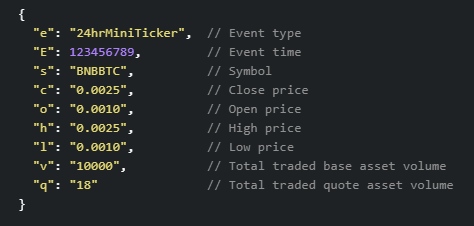

In [126]:
def simple_bot(msg):
    ''' define how to process incoming WebSocket messages '''
    
    time = pd.to_datetime(msg["E"], unit = "ms")
    price = float(msg["c"])
    
    print("Time: {} | Price: {}".format(time, price))
    
    if int(price) % 10 == 0:
        order = client.create_order(symbol = "BTCUSDT", side = "BUY", type = "MARKET", quantity = 0.1)
        print("\n" + 50 * "-")
        print("Buy {} BTC for {} USDT".format(order["executedQty"], order["cummulativeQuoteQty"]))
        print(50 * "-" + "\n")
        
        twm.stop()

In [127]:
twm.start_symbol_miniticker_socket(callback = simple_bot, symbol = "BTCUSDT")

'btcusdt@miniTicker'

In [128]:
client.get_account() 

{'makerCommission': 0,
 'takerCommission': 0,
 'buyerCommission': 0,
 'sellerCommission': 0,
 'commissionRates': {'maker': '0.00000000',
  'taker': '0.00000000',
  'buyer': '0.00000000',
  'seller': '0.00000000'},
 'canTrade': True,
 'canWithdraw': False,
 'canDeposit': False,
 'brokered': False,
 'requireSelfTradePrevention': False,
 'updateTime': 1674299969118,
 'accountType': 'SPOT',
 'balances': [{'asset': 'BNB',
   'free': '1000.00000000',
   'locked': '0.00000000'},
  {'asset': 'BTC', 'free': '0.84393500', 'locked': '0.30000000'},
  {'asset': 'BUSD', 'free': '10000.00000000', 'locked': '0.00000000'},
  {'asset': 'ETH', 'free': '100.00000000', 'locked': '0.00000000'},
  {'asset': 'LTC', 'free': '500.00000000', 'locked': '0.00000000'},
  {'asset': 'TRX', 'free': '500000.00000000', 'locked': '0.00000000'},
  {'asset': 'USDT', 'free': '6720.46382695', 'locked': '0.00000000'},
  {'asset': 'XRP', 'free': '50000.00000000', 'locked': '0.00000000'}],
 'permissions': ['SPOT']}

Time: 2023-01-21 11:20:07.722000 | Price: 22718.65
Time: 2023-01-21 11:20:08.737000 | Price: 22719.17
Time: 2023-01-21 11:20:09.729000 | Price: 22721.39
Time: 2023-01-21 11:20:10.627000 | Price: 22722.36
Time: 2023-01-21 11:20:11.698000 | Price: 22722.88
Time: 2023-01-21 11:20:12.752000 | Price: 22721.51
Time: 2023-01-21 11:20:13.709000 | Price: 22724.5
Time: 2023-01-21 11:20:14.742000 | Price: 22724.9
Time: 2023-01-21 11:20:15.759000 | Price: 22725.08
Time: 2023-01-21 11:20:16.763000 | Price: 22724.12
Time: 2023-01-21 11:20:17.672000 | Price: 22719.98
Time: 2023-01-21 11:20:18.744000 | Price: 22718.94
Time: 2023-01-21 11:20:19.743000 | Price: 22720.14

--------------------------------------------------
Buy 0.10000000 BTC for 2272.03586323 USDT
--------------------------------------------------

